
# Shared rides with pricing - Delft 

 ### Choice Function (Deterministic):
 `pool_price.py`
 * Pickup Distance: distance from driver initial position to the first pickup point
 * Travel Distance: distance from driver's initial position to the drop off point of the last passenger
 * Operating Cost: This include all the expenses
 * Profit: Driver revenue to serve the request
            
 
  ### KPI:
   
   * Profit of Individual driver
   * Profit of all the drivers
   * No.of rejected rides
   * U - PAX (Utility) 
  
   ### TBD- Choice Function (Probablistic):
  
  * choice logic to be applied inside `pool_price.py` 
  * P(R)= exp(beta * Profit_R)/ sum_all the rides( exp(beta * Profit_R)
 



In [2]:
%load_ext autoreload
%autoreload 2
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from MaaSSim.utils import get_config, load_G, prep_supply_and_demand, generate_demand, generate_vehicles, initialize_df  # simulator
from MaaSSim.data_structures import structures as inData
from MaaSSim.simulators import simulate
from MaaSSim.visualizations import plot_veh
from MaaSSim.shared import prep_shared_rides
import logging
import matplotlib.pyplot as plt

import pandas as pd
import ExMAS


## Pricing for Delft, Netherlands

In [4]:
params = get_config('../../data/config/delft.json')  # load configuration

params.times.pickup_patience = 3600 # 1 hour of simulation
params.simTime = 0.1 # 6 minutes hour of simulation
params.nP = 10 # reuqests (and passengers)
params.nV = 10 # vehicles
params.kpi = 1 # vehicles


## Parameters for ExMAS

In [5]:
params.t0 = pd.Timestamp.now()
params.shareability.avg_speed = params.speeds.ride
params.shareability.shared_discount = 0.3
params.shareability.delay_value = 1
params.shareability.WtS = 1.3
params.shareability.price = 1.5 #eur/km
params.shareability.VoT = 0.0035 #eur/s
params.shareability.matching_obj = 'u_pax' #minimize VHT for vehicles
params.shareability.pax_delay = 0
params.shareability.horizon = 600
params.shareability.max_degree = 4
params.shareability.nP = params.nP
params.shareability.share = 1
params.shareability.without_matching = True
params.shareability.operating_cost = 0.5
params.shareability.comm_rate = 0.2

inData = load_G(inData, params)  # load network graph 

inData = generate_demand(inData, params, avg_speed = False)
inData.vehicles = generate_vehicles(inData,params.nV)
inData.vehicles.platform = inData.vehicles.apply(lambda x: 0, axis = 1)
inData.passengers.platforms = inData.passengers.apply(lambda x: [0], axis = 1)
inData.requests['platform'] = inData.requests.apply(lambda row: inData.passengers.loc[row.name].platforms[0], axis = 1) 
inData.platforms = initialize_df(inData.platforms)
inData.platforms.loc[0]=[1,'Uber',30]
params.shareability.share = 1
params.shareability.without_matching = True

inData = ExMAS.main(inData, params.shareability, plot=False) # create shareability graph (ExMAS) 


15-02-23 10:47:00-INFO-Initializing pairwise trip shareability between 10 and 10 trips.
15-02-23 10:47:00-INFO-creating combinations
15-02-23 10:47:00-INFO-90	 nR*(nR-1)
15-02-23 10:47:00-INFO-Reduction of feasible pairs by 93.33%
15-02-23 10:47:00-INFO-Degree 2 	Completed
15-02-23 10:47:00-INFO-trips to extend at degree 2 : 15
15-02-23 10:47:00-INFO-At degree 2 feasible extensions found out of 4 searched
15-02-23 10:47:00-INFO-Degree 3 	Completed
15-02-23 10:47:00-INFO-trips to extend at degree 3 : 4
15-02-23 10:47:00-INFO-At degree 3 feasible extensions found out of 0 searched
15-02-23 10:47:00-INFO-Degree 4 	Completed
15-02-23 10:47:00-INFO-Max degree reached 4
15-02-23 10:47:00-INFO-Trips still possible to extend at degree 4 : 0


In [6]:
inData = prep_shared_rides(inData, params.shareability) # prepare schedules

15-02-23 10:47:00-INFO-Matching 10 trips to 29 rides in order to min u_pax
15-02-23 10:47:00-INFO-Problem solution: Optimal. 
Total costs for single trips:             39 
reduced by matching to:                   35


In [7]:
inData.sblts.rides


,indexes,u_pax,u_veh,kind,u_paxes,times,indexes_orig,indexes_dest,degree,index,...,row,selected,nodes,req_id,sim_schedule,ttrav,dist,fare,commission,driver_revenue
0,[0],3.314500,179,1,[3.3145000000000002],"[0, 179]",[0],[0],1,0,...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[None, 1584551108, 44814383]","[None, 0, 0]",node time req_id od 0 ...,179,1.79,2.68800,0.53760,2.15040
1,[1],1.301000,70,1,[1.3010000000000002],"[17, 70]",[1],[1],1,1,...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[None, 1848200749, 3452839336]","[None, 1, 1]",node time req_id od 0 ...,70,0.70,1.05600,0.21120,0.84480
2,[2],6.757000,365,1,[6.757],"[65, 365]",[2],[2],1,2,...,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 44844890, 44826460]","[None, 2, 2]",node time req_id od 0 NaN...,365,3.65,5.47950,1.09590,4.38360
3,[3],2.705500,146,1,[2.7055000000000002],"[156, 146]",[3],[3],1,3,...,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 44842366, 44796534]","[None, 3, 3]",node time req_id od 0 NaN...,146,1.46,2.19450,0.43890,1.75560
4,[4],4.097500,221,1,[4.0975],"[206, 221]",[4],[4],1,4,...,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 5714816833, 1391531760]","[None, 4, 4]",node time req_id od 0 ...,221,2.21,3.32400,0.66480,2.65920
5,[5],3.960500,214,1,[3.9605],"[225, 214]",[5],[5],1,5,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",1,"[None, 44773463, 44770471]","[None, 5, 5]",node time req_id od 0 NaN...,214,2.14,3.21150,0.64230,2.56920
6,[6],2.466500,133,1,[2.4665],"[247, 133]",[6],[6],1,6,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",1,"[None, 44872123, 5119770539]","[None, 6, 6]",node time req_id od 0 ...,133,1.33,2.00100,0.40020,1.60080
7,[7],4.611000,249,1,[4.611],"[263, 249]",[7],[7],1,7,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",0,"[None, 663333161, 559635312]","[None, 7, 7]",node time req_id od 0 N...,249,2.49,3.73950,0.74790,2.99160
8,[8],3.003000,162,1,[3.003],"[287, 162]",[8],[8],1,8,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",0,"[None, 599022490, 565034413]","[None, 8, 8]",node time req_id od 0 N...,162,1.62,2.43600,0.48720,1.94880
9,[9],7.375000,398,1,[7.375],"[294, 398]",[9],[9],1,9,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 44871801, 1679761088]","[None, 9, 9]",node time req_id od 0 ...,398,3.98,5.98200,1.19640,4.78560


In [8]:
rf[(rf['indexes_orig'].map(len) > 1) & (rf['driver_revenue']==rf['driver_revenue'].max())].iloc[0]

NameError: name 'rf' is not defined

## Simulation with MaaSSim 

In [9]:
sim = simulate(params = params, inData = inData, logger_level = logging.WARNING) # simulate

15-02-23 10:47:03-INFO-Matching 10 trips to 29 rides in order to min u_pax
15-02-23 10:47:03-INFO-Problem solution: Optimal. 
Total costs for single trips:             39 
reduced by matching to:                   35
15-02-23 10:47:03-WARNING-Setting up 0.1h simulation at 2023-02-15 10:45:04 for 10 vehicles and 10 passengers in Delft, Netherlands
0.5
15-02-23 10:47:03-CRITICAL-this is request 0 with [0, 10, 11] available rides.
15-02-23 10:47:03-CRITICAL-ride 0 available [1]
15-02-23 10:47:03-CRITICAL-ride 10 available [1, 0]
15-02-23 10:47:03-CRITICAL-ride 11 available [1, 0]
15-02-23 10:47:03-CRITICAL-this is reuqest 0 with [0, 10, 11] still available rides.
15-02-23 10:47:03-CRITICAL-vehicle 1 has 3 choices
15-02-23 10:47:03-CRITICAL-vehicle 1 has chosen to serve request 0 with a ride 0 of degree 1, with travellers [0].
0.5
0.5
15-02-23 10:47:03-CRITICAL-this is request 2 with [2, 12, 13, 14, 19, 20, 25, 26] available rides.
15-02-23 10:47:03-CRITICAL-ride 2 available [1]
15-02-23 1

In [10]:
sim.res[0].pax_exp



,ACCEPTS_OFFER,ARRIVES_AT_DROPOFF,ARRIVES_AT_PICKUP,DEPARTS_FROM_PICKUP,MEETS_DRIVER_AT_PICKUP,RECEIVES_OFFER,REQUESTS_RIDE,SETS_OFF_FOR_DEST,STARTS_DAY,IS_REJECTED_BY_VEHICLE,REJECTS_OFFER,ARRIVES_AT_DEST,PREFERS_OTHER_SERVICE,LOSES_PATIENCE,TRAVEL,WAIT,OPERATIONS
pax,,,,,,,,,,,,,,,,,
0,15.0,179.0,20.0,30.0,389.0,0.0,0.0,10.0,0,0,0,0,0,0,179.0,389.0,55.0
1,15.0,70.0,20.0,30.0,57.0,0.0,17.0,10.0,0,0,0,0,0,0,70.0,57.0,55.0
2,15.0,315.0,20.0,30.0,68.0,89.0,65.0,10.0,0,0,0,0,0,0,315.0,157.0,55.0
3,15.0,181.0,20.0,30.0,45.0,15.0,156.0,10.0,0,0,0,0,0,0,181.0,60.0,55.0
4,15.0,272.0,35.0,30.0,166.0,156.0,35.0,10.0,0,0,0,0,0,0,272.0,322.0,55.0
5,15.0,214.0,20.0,30.0,0.0,0.0,225.0,10.0,0,0,0,0,0,0,214.0,0.0,55.0
6,15.0,133.0,20.0,30.0,199.0,0.0,247.0,10.0,0,0,0,0,0,0,133.0,199.0,55.0
7,15.0,278.0,4.0,30.0,198.0,16.0,263.0,10.0,0,0,0,0,0,0,278.0,214.0,55.0
8,15.0,179.0,35.0,30.0,222.0,65.0,207.0,10.0,0,0,0,0,0,0,179.0,287.0,55.0


In [11]:
responses = []
for i in range(1, 4):
    params.kpi = i
    sim = simulate(params = params, inData = inData, logger_level = logging.WARNING) # simulate
    sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index
    sim.res[0].veh_exp['ds'] = f"{i}"
    responses.append(sim.res[0].veh_exp)
    

15-02-23 10:47:11-WARNING-Setting up 0.1h simulation at 2023-02-15 10:45:04 for 10 vehicles and 10 passengers in Delft, Netherlands
0.5
15-02-23 10:47:11-CRITICAL-this is request 0 with [0, 10, 11] available rides.
15-02-23 10:47:11-CRITICAL-ride 0 available [1]
15-02-23 10:47:11-CRITICAL-ride 10 available [1, 0]
15-02-23 10:47:11-CRITICAL-ride 11 available [1, 0]
15-02-23 10:47:11-CRITICAL-this is reuqest 0 with [0, 10, 11] still available rides.
15-02-23 10:47:11-CRITICAL-vehicle 1 has 3 choices
15-02-23 10:47:11-CRITICAL-vehicle 1 has chosen to serve request 0 with a ride 0 of degree 1, with travellers [0].
0.5
0.5
15-02-23 10:47:11-CRITICAL-this is request 2 with [2, 12, 13, 14, 19, 20, 25, 26] available rides.
15-02-23 10:47:11-CRITICAL-ride 2 available [1]
15-02-23 10:47:11-CRITICAL-ride 12 available [1, 0]
15-02-23 10:47:11-CRITICAL-ride 13 available [1, 0]
15-02-23 10:47:11-CRITICAL-ride 14 available [1, 0]
15-02-23 10:47:11-CRITICAL-ride 19 available [1, 0]
15-02-23 10:47:11-C

In [12]:
sim.res[0].veh_exp

,nRIDES,nREJECTED,OUT,STARTS_DAY,OPENS_APP,RECEIVES_REQUEST,ACCEPTS_REQUEST,REJECTS_REQUEST,IS_ACCEPTED_BY_TRAVELLER,IS_REJECTED_BY_TRAVELLER,...,ENDS_SHIFT,TRAVEL,WAIT,CRUISE,OPERATIONS,IDLE,PAX_KM,REVENUE,Vehicles,ds
veh,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,False,0,0,0.0,15.0,0,20.0,0,...,7136.0,179.0,0,179.0,65.0,6713.0,1.792,2.1504,1,3
2,2.0,0.0,False,0,0,156.0,15.0,0,21.0,0,...,6861.0,272.0,0,175.0,95.0,6319.0,3.679,2.6592,2,3
3,2.0,0.0,False,0,0,263.0,15.0,0,51.0,0,...,6368.0,412.0,0,390.0,126.0,5440.0,6.481,4.7856,3,3
4,0.0,0.0,False,0,0,294.0,0.0,0,0.0,0,...,7265.0,0.0,0,0.0,0.0,7265.0,0.000,0.0000,4,3
5,2.0,0.0,False,0,0,49.0,30.0,0,40.0,0,...,6940.0,284.0,0,156.0,130.0,6370.0,2.845,2.5692,5,3
6,0.0,0.0,False,0,0,0.0,0.0,0,0.0,0,...,7559.0,0.0,0,0.0,0.0,7559.0,0.000,0.0000,6,3
7,2.0,0.0,False,0,0,65.0,15.0,0,100.0,0,...,6762.0,179.0,0,378.0,175.0,6030.0,5.277,1.9488,7,3
8,1.0,0.0,False,0,0,247.0,15.0,0,20.0,0,...,6746.0,133.0,0,368.0,65.0,6180.0,1.334,1.6008,8,3
9,0.0,0.0,False,0,0,0.0,0.0,0,0.0,0,...,7559.0,0.0,0,0.0,0.0,7559.0,0.000,0.0000,9,3


<AxesSubplot:xlabel='Vehicles', ylabel='REVENUE'>

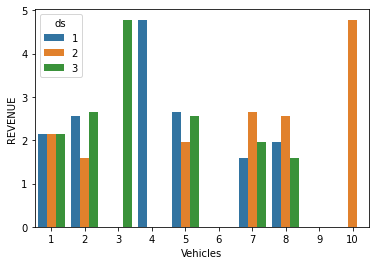

In [13]:
import seaborn as sns
datasets = pd.concat([*responses])

sns.barplot(x='Vehicles', y='REVENUE',hue='ds',  data=datasets)

,nRIDES,nREJECTED,OUT,STARTS_DAY,OPENS_APP,RECEIVES_REQUEST,ACCEPTS_REQUEST,REJECTS_REQUEST,IS_ACCEPTED_BY_TRAVELLER,IS_REJECTED_BY_TRAVELLER,...,DECIDES_NOT_TO_DRIVE,ENDS_SHIFT,TRAVEL,WAIT,CRUISE,OPERATIONS,IDLE,PAX_KM,REVENUE,nREJECTS
veh,,,,,,,,,,,,,,,,,,,,,
1,2.0,0.0,False,0,0,29.0,30.0,0,40.0,0,...,0,6762.0,325.0,0,313.0,130.0,5994.0,3.264,2.56560,NaN
2,0.0,0.0,False,0,0,0.0,0.0,0,0.0,0,...,0,7559.0,0.0,0,0.0,0.0,7559.0,0.000,0.00000,NaN
3,1.0,0.0,False,0,0,282.0,15.0,0,20.0,0,...,0,6848.0,293.0,0,71.0,65.0,6419.0,2.937,3.52440,NaN
4,0.0,0.0,False,0,0,0.0,0.0,0,0.0,0,...,0,7559.0,0.0,0,0.0,0.0,7559.0,0.000,0.00000,NaN
5,2.0,0.0,False,0,0,104.0,15.0,0,186.0,0,...,0,6871.0,241.0,0,82.0,261.0,6287.0,2.946,2.47464,NaN
6,0.0,0.0,False,0,0,222.0,0.0,0,0.0,0,...,0,7337.0,0.0,0,0.0,0.0,7337.0,0.000,0.00000,NaN
7,2.0,0.0,False,0,0,37.0,15.0,0,156.0,0,...,0,6509.0,629.0,0,153.0,231.0,5496.0,9.497,7.97748,NaN
8,1.0,0.0,False,0,0,75.0,15.0,0,20.0,0,...,0,7047.0,217.0,0,155.0,65.0,6610.0,2.174,2.60880,NaN
9,2.0,0.0,False,0,0,73.0,15.0,0,169.0,0,...,0,6300.0,506.0,0,436.0,244.0,5114.0,8.377,7.03668,NaN


In [63]:
sim.res[0].all_kpi # All driver revenue 

26.889719999999997

In [69]:
sim.params.kpi





2

In [64]:
sim.res[0].veh_exp['REVENUE'].to_list()

[4.1537999999999995,
 4.6655999999999995,
 2.0148,
 5.080319999999999,
 0.0,
 0.0,
 3.8964,
 4.4052,
 2.6736000000000004,
 0.0]

In [52]:

list(sim.vehs.keys())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [53]:
sim.res[0].all_kpi

26.889719999999997

## Plotting Graph of driver vs revenue

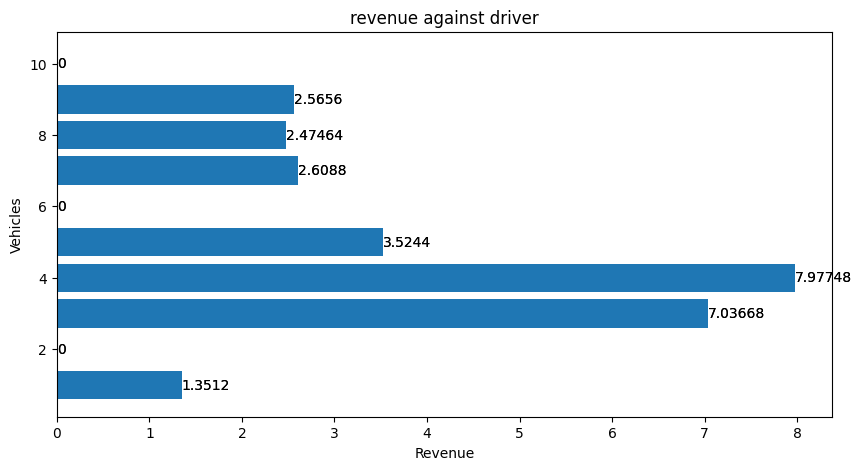

In [76]:
# plot graph of driver revenue
vehicles  = list(sim.res[0].veh_exp.index.to_list())
revenues = sim.res[0].veh_exp['REVENUE'].to_list()
fig, ax = plt.subplots(figsize = (10,5))
bars = ax.barh(vehicles, revenues)
ax.bar_label(bars)
for bars in ax.containers:
    ax.bar_label(bars)


plt.xlabel("Revenue")
plt.ylabel("Vehicles")
plt.title("revenue against driver")
plt.show()

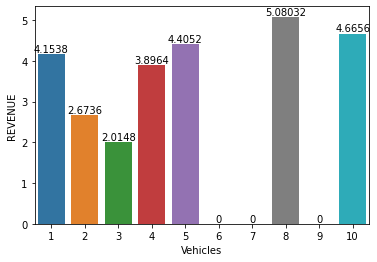

In [55]:
import seaborn as sns
sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index

ax =sns.barplot(data=sim.res[0].veh_exp, x="Vehicles", y="REVENUE")
for i in ax.containers:
    ax.bar_label(i,)

<AxesSubplot: xlabel='day', ylabel='total_bill'>

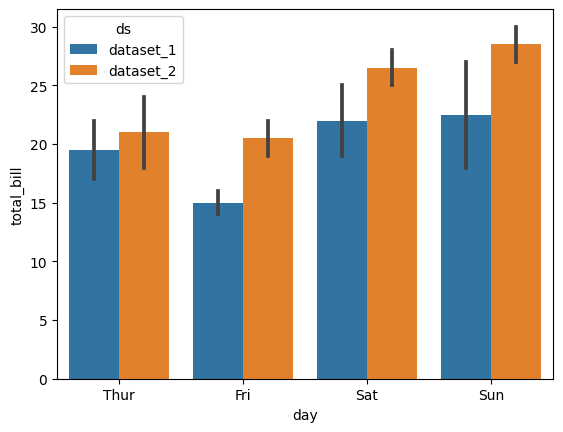

In [82]:

import seaborn as sns
import pandas as pd

ds1 = pd.DataFrame({'day':['Thur','Fri', 'Sat', 'Sun', 'Thur','Fri', 'Sat', 'Sun'],
                   'total_bill': [17,14,19,18, 22, 16, 25, 27]})

ds2 = pd.DataFrame({'day':['Thur','Fri', 'Sat', 'Sun', 'Thur','Fri', 'Sat', 'Sun'],
                   'total_bill': [18,22,25,27, 24,19,28,30]})

ds2['ds'] = 'dataset_2'
ds1['ds'] = 'dataset_1'
dss = pd.concat([ds1, ds2])
sns.barplot(x='day', y='total_bill', hue='ds', data=dss)